# Exploratory Data Analysis of IPL Datasets


The Indian Premier League (IPL) is a professional Twenty20 cricket league in India. It features eight teams representing different cities. IPL matches are known for their high intensity and entertainment value, attracting top players from around the world. The league has a massive fan following and is a major sporting event in India.

The code given below imports the dictionaries required for data manipulation and visualization. These are, namely, pandas, numpy, matplotlib and seaborn. These have been imported using the `import` function.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

For this EDA, two files have been taken. The first dataset which has been stored as `df_ball` concsist of data of every single ball played in the IPL whereas the second dataset which has been stord under the variable name `df_match` consist of a summary of every match played in the IPL.

In [ ]:
df_ball = pd.read_csv("/content/drive/MyDrive/IPL_Ball_by_Ball_2008_2022.csv")
df_match = pd.read_csv("/content/drive/MyDrive/IPL_Matches_2008_2022.csv")

For the EDA, the match data has been first chosen as it conisists of fewer coulumns. The `head` function has been used to view the first few rows.

In [ ]:
df_match.head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5.0,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8.0,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit


In [ ]:
print("The shape of the dataset is " , df_match.shape)

The shape of the dataset is  (950, 20)


Looking at the Dataset, it is clear that some features are of little to no use in the EDA, therefore they have been removed using the `drop` method. These featured either consist of too much data to be analyzed or don't contain any important data.

In [ ]:
df_match.drop(["ID" , "Date" , "MatchNumber" , "Team1Players" , "Team2Players"] , axis = 1 , inplace = True)

The `isnull()` function has been used to check the number of null values in each coulumn.

In [ ]:
df_match.isnull().sum()

City                51
Season               0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Umpire1              0
Umpire2              0
dtype: int64

To remove all the null values, in certain numerical features the null vales have been filled with the mean, in categrical features they have been filled with the mode and in cases where the null values are less they have been dropped. Finally, the number of null values are once agin checked.

In [ ]:
df_match["Margin"] = df_match["Margin"].fillna(df_match["Margin"].mean())
df_match["City"] = df_match["City"].fillna(df_match["City"].mode())
df_match.drop(["method"] , axis = 1 , inplace = True)
df = df_match.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             895 non-null    object 
 1   Season           895 non-null    object 
 2   Team1            895 non-null    object 
 3   Team2            895 non-null    object 
 4   Venue            895 non-null    object 
 5   TossWinner       895 non-null    object 
 6   TossDecision     895 non-null    object 
 7   SuperOver        895 non-null    object 
 8   WinningTeam      895 non-null    object 
 9   WonBy            895 non-null    object 
 10  Margin           895 non-null    float64
 11  Player_of_Match  895 non-null    object 
 12  Umpire1          895 non-null    object 
 13  Umpire2          895 non-null    object 
dtypes: float64(1), object(13)
memory usage: 104.9+ KB


This hass been done change the index numbers afgter dropping.

In [ ]:
df_match.reset_index(inplace = True)

The number of duplicate values are checked using the `duplicated` function.

In [ ]:
df.duplicated().sum()

0

In the following few lines of code, various graphs have been employed to carry out univariant and bivariant analysis. The method and results of which are interpreted below.

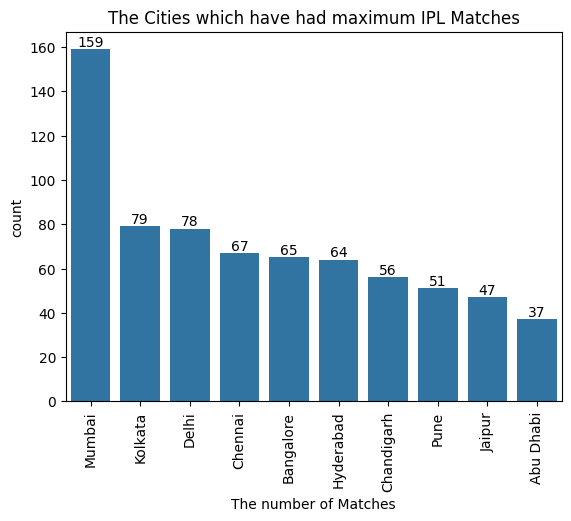

In [ ]:
plt.figure()
ax = sns.countplot(x=df_match['City'],
                   order=df_match['City'].value_counts(ascending=False).index[:10]);

abs_values = df_match['City'].value_counts(ascending=False).values[:10]

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("The Cities which have had maximum IPL Matches")
plt.xlabel("The number of Matches")
plt.xticks(rotation = 90)
plt.show()

This is a countplot of the cities where the maximu number of Matches have been played. It is clear that most IPL matches have been played in Mumbai.

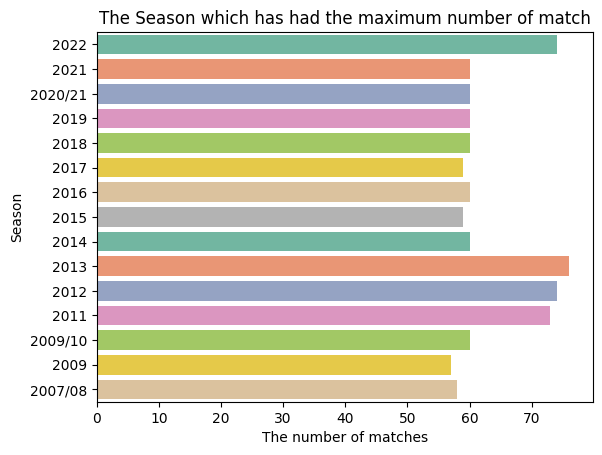

In [ ]:
plt.figure()
sns.countplot(df_match["Season"] , palette = "Set2")
plt.title("The Season which has had the maximum number of match")
plt.xlabel("The number of matches")
plt.show()

This is a countplot of the IPL season which had the most number of matches. While most IPL seasons had similar number of matches, 2013 had the ost number of matches.

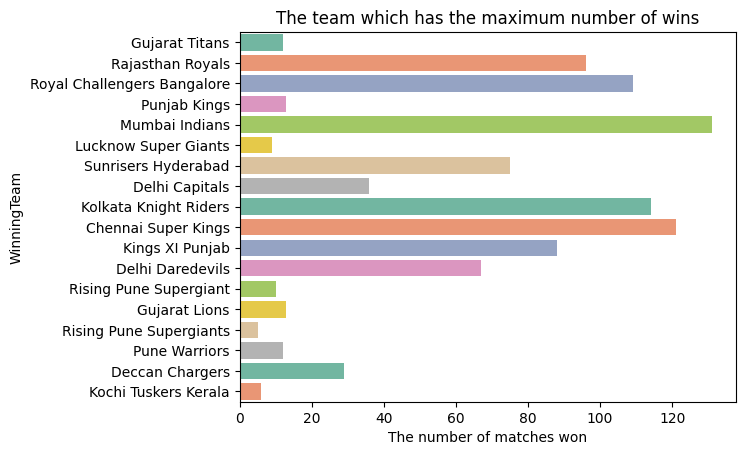

In [ ]:
plt.figure()
sns.countplot(df_match["WinningTeam"] , palette = "Set2")
plt.title("The team which has the maximum number of wins")
plt.xlabel("The number of matches won")
plt.show()

In this graph also countplot has been used to determine the IPL team which has had the most number of wins. Mumbai Indians had the most number IPL wins.

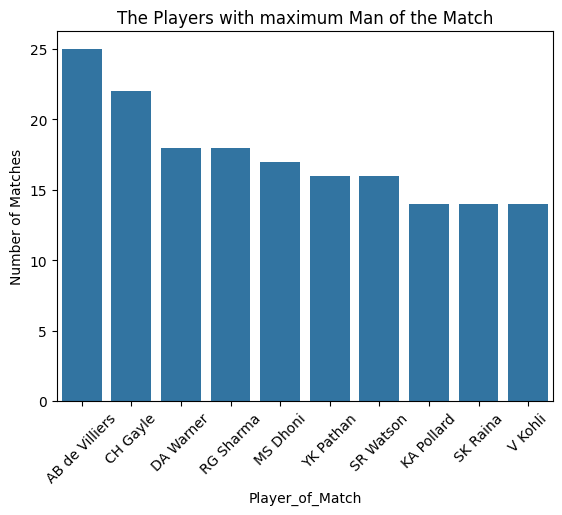

In [ ]:
top = df_match["Player_of_Match"].value_counts()[0:10]
plt.figure()
sns.barplot(x = top.index , y = top)
plt.title("The Players with maximum Man of the Match")
plt.xticks(rotation = 45)
plt.ylabel("Number of Matches")
plt.show()

In the above graph, the ten players with the most number of player of the match awards. AB de Villiers has the most man of the match awards followed by CH Gayle.

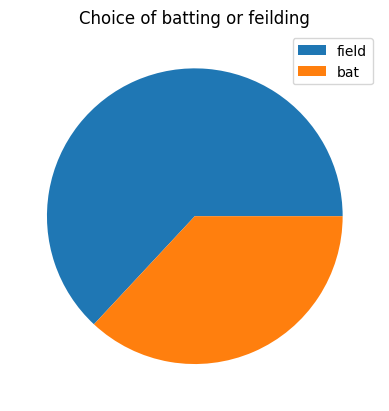

In [ ]:
plt.figure()
plt.pie(df_match["TossDecision"].value_counts())
plt.legend(["field" , "bat"])
plt.title("Choice of batting or feilding")
plt.show()

This pi chart represents the choice made by the captain of a team to bat or field following the winning of the toss. The graph shows that most times, captains have chosen to field.

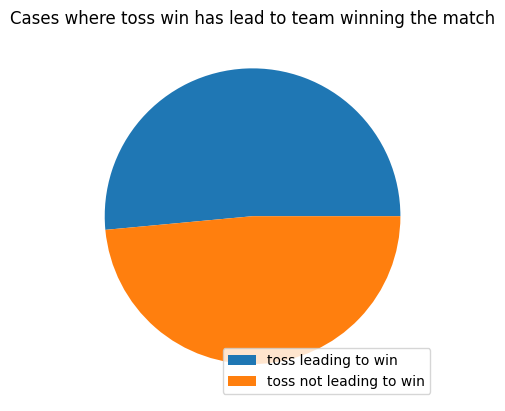

In [ ]:
win = list(df_match["TossWinner"] == df_match["WinningTeam"])
plt.figure()
plt.pie([win.count(True) , win.count(False)])
plt.legend(["toss leading to win" , "toss not leading to win"])
plt.title("Cases where toss win has lead to team winning the match")
plt.show()

This pi chart checks if there is any correlation between winning the toss and winning the math. As the two variables have nearly same number of occourances, there is no significant correlation.

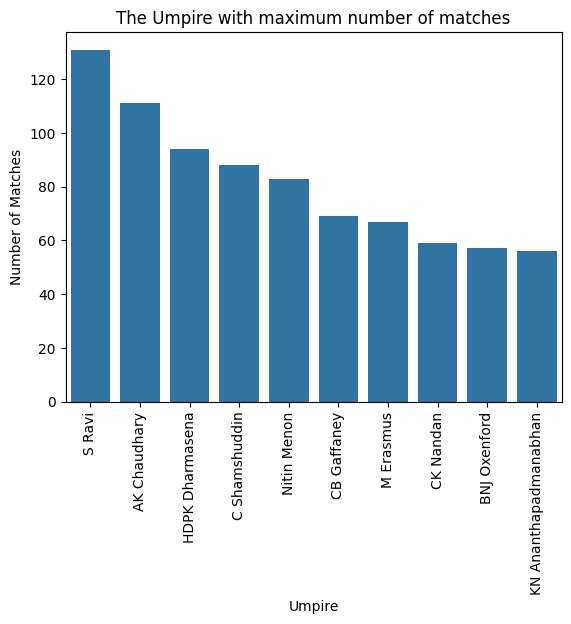

In [ ]:
ump = pd.melt(df_match, value_vars=['Umpire1', 'Umpire2'])
ump_high = ump.value.value_counts()[0:10]
plt.figure()
sns.barplot(x = ump_high.index , y = ump_high)
plt.title("The Umpire with maximum number of matches")
plt.xticks(rotation = 90)
plt.xlabel('Umpire')
plt.ylabel("Number of Matches")
plt.show()

In this graph the melt function has been ued to combine two columns of a dtaframe n order to determine the umpire who has been a part of maximum IPL matches. From the graph it is easy to determine that S Ravi has umpired the most IPL matches.

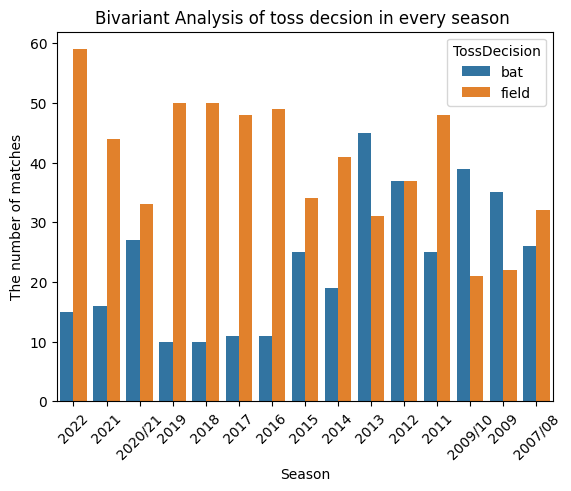

In [ ]:
plt.figure()
sns.countplot(x = 'Season', hue = 'TossDecision', data=df_match)
plt.title("Bivariant Analysis of toss decsion in every season ")
plt.ylabel("The number of matches")
plt.xticks(rotation = 45)
plt.show()

This plot is a bivariant analysis of the toss choice made across all seasons. The hue has been added to a countplot.

Having Finished the Analysis of the first Dataset, the Second dataset has been chosen for analysis. The head function has been used to print the first few rows.

In [ ]:
df_ball.head(10)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
print(f"The shape of the dataset is " , df_ball.shape)

The shape of the dataset is  (225954, 17)


In order to obtain information about the dataset, the `info` function has been employed.

In [ ]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

The number of null values have been checked and columns with paticularly high number of null values have been dropped.

In [ ]:
df_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [ ]:
df_ball.drop(["ID" , "extra_type" , "player_out" , "kind" , "fielders_involved"] , axis = 1 , inplace = True)

The duplicated function has been used to find the number of dulicates. While there are 582 duplicatevalues they should not be removed given the nature of the dataset.

In [ ]:
df_ball.duplicated().sum()

582

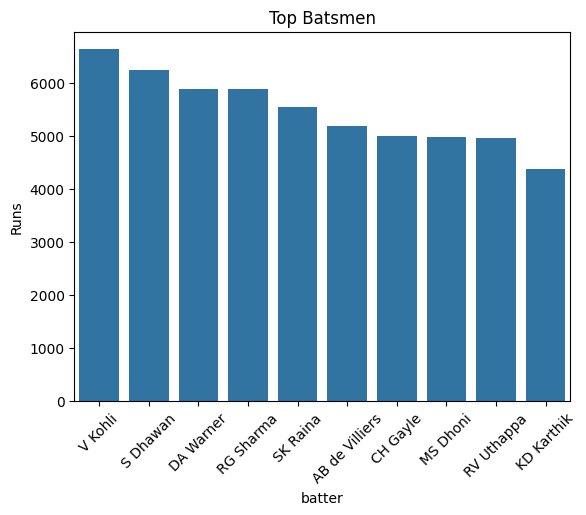

In [ ]:
top_bat = df_ball.groupby("batter").agg("sum")["batsman_run"].sort_values(ascending = False)[0:10]
plt.figure()
sns.barplot(x = top_bat.index , y = top_bat)
plt.title("Top Batsmen")
plt.xticks(rotation = 45)
plt.ylabel("Runs")
plt.show()

In the above code, the dataset has been grouped by the batsman, and the sum of all the runs made are calculated using the `agg` function. The graph shows the batsman with the ten highest number of runs in the IPL. V Kohli has the highest number of runs.

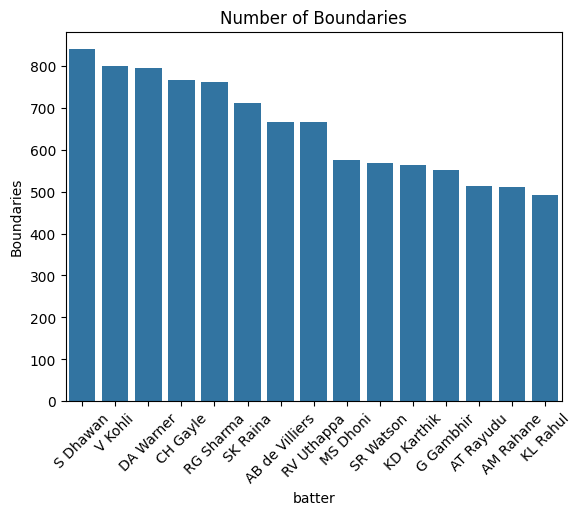

In [ ]:
bound = df_ball.groupby("batter")["batsman_run"].agg(lambda x: (x >= 4).sum()).sort_values(ascending = False)[0:15]
plt.figure()
sns.barplot(x = bound.index , y = bound)
plt.title("Number of Boundaries")
plt.ylabel("Boundaries")
plt.xticks(rotation = 45)
plt.show()

A Similar mathod has been used to determine the 10 batters with the maximum number of boundaries in the IPL and for this the lambda function has been used. S Dhawan has the highest number of boundaries.

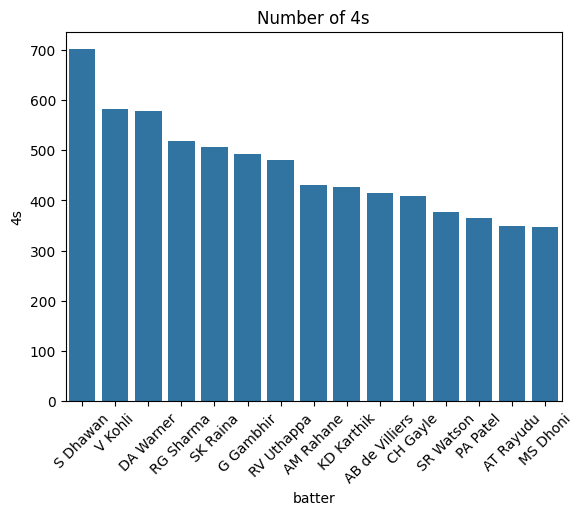

In [ ]:
bound_4 = df_ball.groupby("batter")["batsman_run"].agg(lambda x: (x == 4).sum()).sort_values(ascending = False)[0:15]
plt.figure()
sns.barplot(x = bound_4.index , y = bound_4)
plt.title("Number of 4s")
plt.ylabel("4s")
plt.xticks(rotation = 45)
plt.show()

The graph is a bar graph of the batters with the msot number of fours. It is clear that is this as well S Dhawan has the maximum number of 4s.





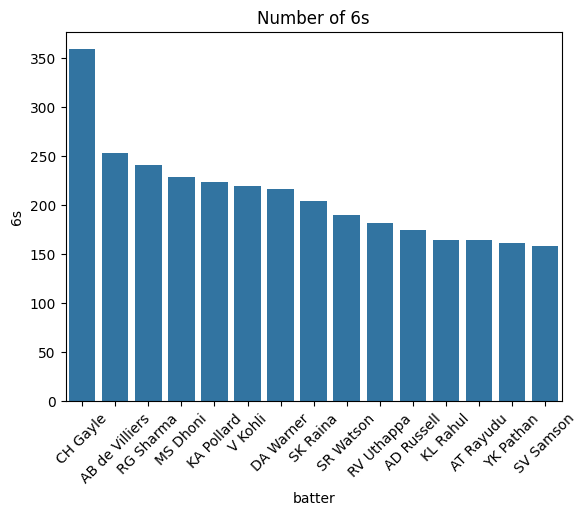

In [ ]:
bound_6 = df_ball.groupby("batter")["batsman_run"].agg(lambda x: (x == 6).sum()).sort_values(ascending = False)[0:15]
plt.figure()
sns.barplot(x = bound_6.index , y = bound_6)
plt.title("Number of 6s")
plt.ylabel("6s")
plt.xticks(rotation = 45)
plt.show()

The graph is a bar graph of the batters with the msot number of 6s. It is clear that is this as well CH Gayle has the maximum number of 6s.

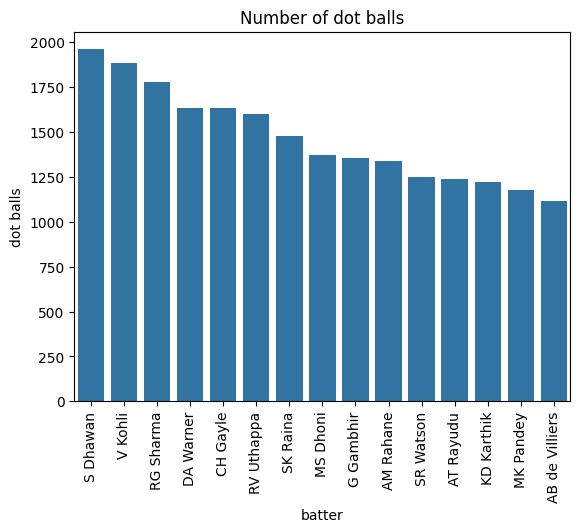

In [ ]:
dot = df_ball.groupby("batter")["batsman_run"].agg(lambda x: (x == 0).sum()).sort_values(ascending = False)[0:15]
plt.figure()
sns.barplot(x = dot.index , y = dot)
plt.title("Number of dot balls")
plt.ylabel("dot balls")
plt.xticks(rotation = 90)
plt.show()

The graph is a bar graph of the batters with the most number of dot balls. It is clear that is this as well S Dhawan has the maximum number of dot balls.

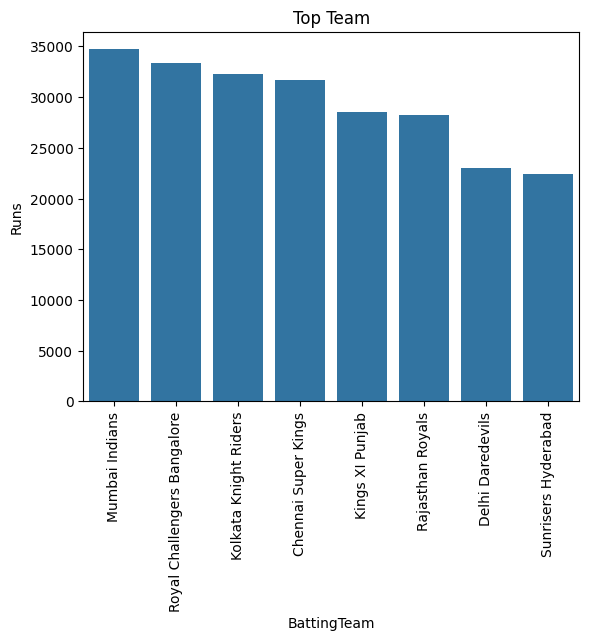

In [ ]:
team_bat = df_ball.groupby("BattingTeam").agg("sum")["batsman_run"].sort_values(ascending = False)[0:8]
plt.figure()
sns.barplot(x = team_bat.index , y = team_bat)
plt.title("Top Team")
plt.xticks(rotation = 90)
plt.ylabel("Runs")
plt.show()

This is a bar graph of the teams with the highest number of runs. Mumbai Indians followed by RCB has the highest number of runs.

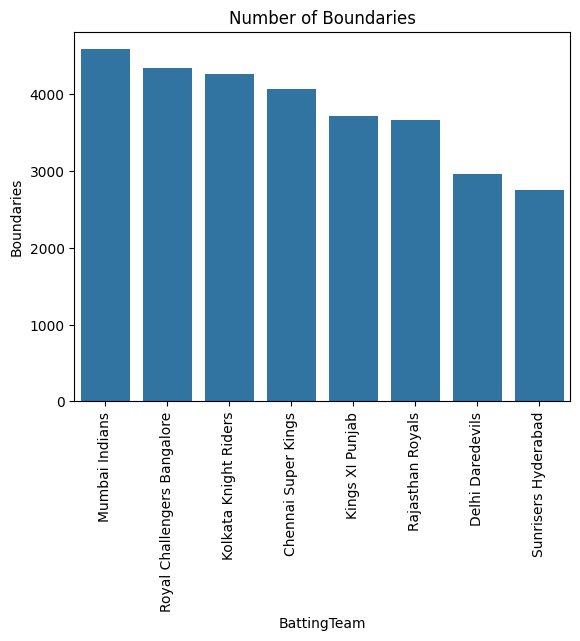

In [ ]:
bound_team = df_ball.groupby("BattingTeam")["batsman_run"].agg(lambda x: (x >= 4).sum()).sort_values(ascending = False)[0:8]
plt.figure()
sns.barplot(x = bound_team.index , y = bound_team)
plt.title("Number of Boundaries")
plt.ylabel("Boundaries")
plt.xticks(rotation = 90)
plt.show()

Mumbai Indians is also the team which has the maximum number of boundaries.

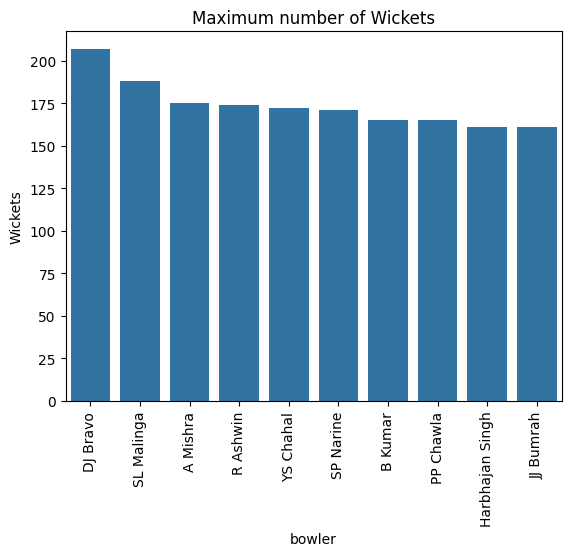

In [ ]:
top_bow = df_ball.groupby('bowler').agg("sum")["isWicketDelivery"].sort_values(ascending = False)[0:10]
plt.figure()
sns.barplot(x = top_bow.index , y = top_bow)
plt.title("Maximum number of Wickets")
plt.xticks(rotation = 90)
plt.ylabel("Wickets")
plt.show()

Having finished the analysis of batting, the following few graphs show data about bowlers. The first graph shows the top wicket takers in IPL. DJ Bravo has the most number of wickets.

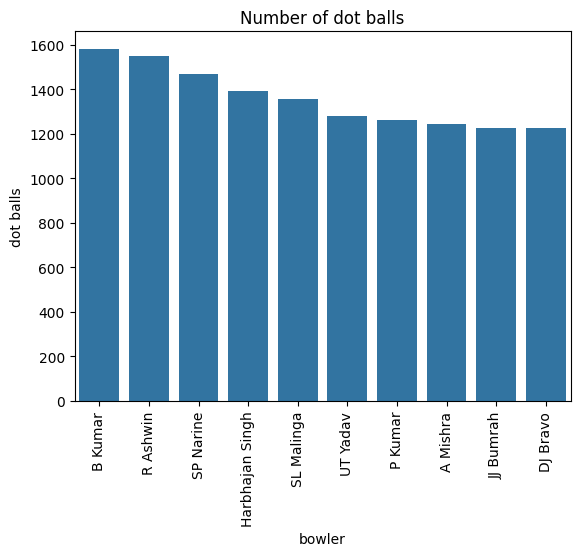

In [ ]:
dot_bow = df_ball.groupby("bowler")["batsman_run"].agg(lambda x: (x == 0).sum()).sort_values(ascending = False)[0:10]
plt.figure()
sns.barplot(x = dot_bow.index , y = dot_bow)
plt.title("Number of dot balls")
plt.ylabel("dot balls")
plt.xticks(rotation = 90)
plt.show()

This graph tells us that B kumar has bowled the most number of dot balls.

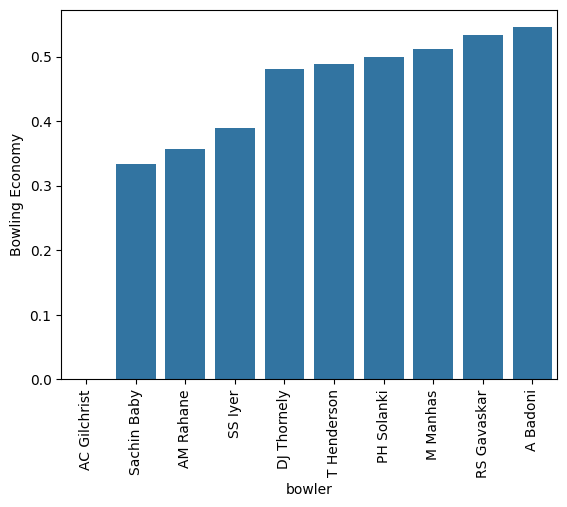

In [ ]:
df_b = df_ball.groupby("bowler").agg("sum")
df_b["Bowling Economy"] = df_b["total_run"]/((df_b["overs"])/6)
be = df_b["Bowling Economy"].sort_values(ascending = True)[0:10]
plt.figure()
sns.barplot(x = be.index , y = be)
plt.xticks(rotation = 90)
plt.show()

This graph shows us the bowlers in the IPL who have the best bowling economies. From the data, AC Gilchrist has the best average of 0.

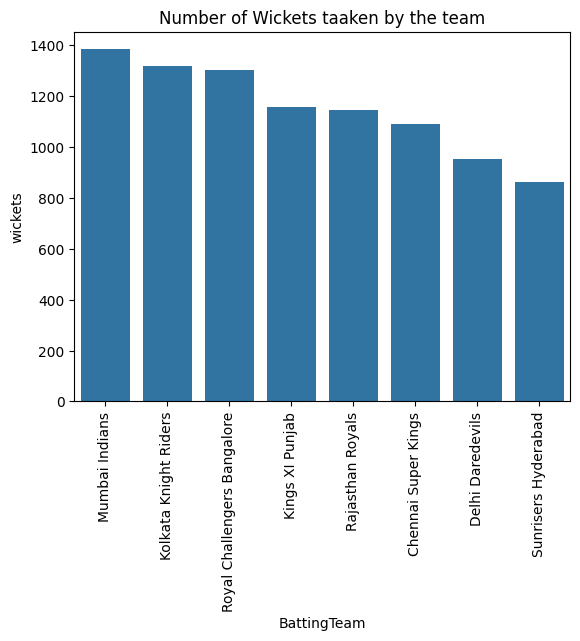

In [ ]:
team_wik = df_ball.groupby("BattingTeam").agg("sum")["isWicketDelivery"].sort_values(ascending = False)[0:8]
plt.figure()
sns.barplot(x = team_wik.index , y = team_wik)
plt.title("Number of Wickets taaken by the team")
plt.ylabel("wickets")
plt.xticks(rotation = 90)
plt.show()

This graph shows us the team whic has had the most number of wickets.

In Conclusion, this is a complete player and team wise analysis of IPL matches played from 2008 to 2022. Various graphing tools such as countplot, pie charts and bargraphs have been used to come to the resulst mentioned above.